In [ ]:
"""
MLPClassification:
-> use log loss (default)
-> hidden_layer_sizes=(100,) (default)
-> any number of hidden layer (hidden_layer_sizes={tuple(x,y,z...*any)})
-> activation: "relu" (default)
-> activation: can be changed into: {'identity', 'logistic', 'tanh', 'relu'}
-> - solver: 'adam' (default), the solver for weight optimization
-> - Can be changed to {'lbfgs', 'sgd', 'adam'}



"""

'\nMLPClassification:\n-> use log loss (default)\n-> hidden_layer_sizes=(100,) (default)\n-> any number of hidden layer (hidden_layer_sizes={tuple(x,y,z...*any)})\n-> activation: "relu" (default)\n-> activation: can be changed into: {\'identity\', \'logistic\', \'tanh\', \'relu\'}\n-> - solver: \'adam\' (default), the solver for weight optimization\n-> - Can be changed to {\'lbfgs\', \'sgd\', \'adam\'}\n\n\n'

In [ ]:
"""
iris using mlpclassifier
"""

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

path="https://drive.google.com/uc?export=download&id=1UwpW8GELggsVNj1IHtAo5rm4js_6b6PZ"
data = pd.read_csv(path)
x_train, x_test, y_train, y_test = train_test_split(data.drop('variety', axis=1), data['variety'], test_size=0.4, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(20,15,10), max_iter=1000, random_state=42)
mlp.fit(x_train, y_train)

y_pred = mlp.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)




0.9833333333333333


In [ ]:
"""
x,y mlpclassifier and mlpregressor using iris dataset
"""

from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
path="https://drive.google.com/uc?export=download&id=1UwpW8GELggsVNj1IHtAo5rm4js_6b6PZ"
data = pd.read_csv(path)
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier

x=np.array([[7],[2],[5],[3],[4],[6]])
y=np.array([1,2,1,1,2,2])

x_train,x_test,y_train,y_test=train_test_split(data.drop(["variety"],axis=1),data["variety"],test_size=0.3,random_state=42)

mlpC = MLPClassifier(hidden_layer_sizes=(15,10),max_iter=1000,random_state=42)
mlpC.fit(x,y)
mlpR = MLPRegressor(hidden_layer_sizes=(15,10),max_iter=1000,random_state=42)
mlpR.fit(x,y)
for i in range(10):
  print(i,mlpC.predict([[i]]))
  print(i,mlpR.predict([[i]]))





0 [2]
0 [0.64750341]
1 [2]
1 [0.77356219]
2 [2]
2 [0.91715633]
3 [2]
3 [1.12069919]
4 [2]
4 [1.32424206]
5 [1]
5 [1.52778493]
6 [1]
6 [1.73132779]
7 [1]
7 [1.93487066]
8 [1]
8 [2.13841352]
9 [1]
9 [2.34195639]


In [1]:
"""
mnist dataset using mlpclassifier
Training -> trained
"""
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import scipy

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

(x_train, y_train), (x_test, y_test) = mnist.load_data()

blur=[
    [1/9,1/9,1/9],
    [1/9,1/9,1/9],
    [1/9,1/9,1/9]
]
blured=scipy.signal.convolve(x_train[0],blur)
blured2=scipy.signal.convolve(blured,blur)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

mlp=MLPClassifier(hidden_layer_sizes=(200,100,10))
mlp.fit(x_train,y_train)

p_pred = mlp.predict(x_test)
accuracy = accuracy_score(y_test, p_pred)
print(accuracy) # 0.9784


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
0.9784


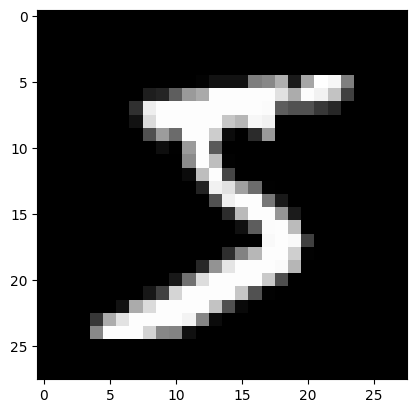

[5]
5


In [9]:
"""
testing -> tested on original img
"""
plt.imshow(x_train[0].reshape(28,28), cmap='gray')
plt.show()
print(mlp.predict([x_train[0].reshape(784)]))
print(y_train[0])



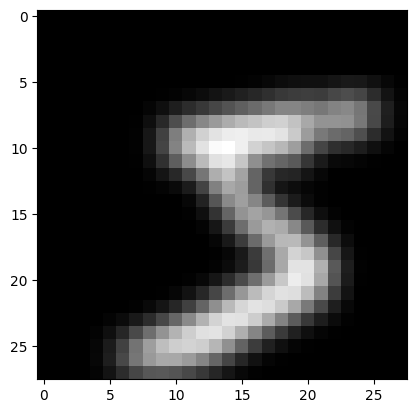

[3]
[5]


In [4]:
"""
Testing -> tested on blured img
"""
b=blured2[0:28,0:28]
plt.imshow(b, cmap='gray')
plt.show()
print(mlp.predict([b.reshape(784)]))
print(mlp.predict([blured[0:28,0:28].reshape(784)]))